## Instructions
**Please following the instructions precisely!**
* Please upload this jupyter notebook template to iCollege as your homework submission
* You will need to fill your code block within the following structure

    ```python
    #### START YOUR CODE HERE ####

    ####  END YOUR CODE HERE  ####
    ```
* For code placeholders like below, you need to replace None with your own code

    ```python
    #### START YOUR CODE HERE ####
    A = None
    ####  END YOUR CODE HERE  ####
    ```
* You may noticed that there are annotations on coding steps, such as step 1, step 2, etc. Those are basically hints and suggestions to help you construct you coding logic, you don't necessarily follow those suggested coding patterns if you have your own way of coding. However, you do need to follow the required input (function name, function parameter list, etc.) and output (return values, output format, etc.) format

# Stochastic & Mini-Batch Gradient Descent Algorithms

## Objective  
In our first homework assignment, we've implemented the gradient descent algorithm to help find the best model fit for the given dataset. This algorithm is also known as the **Batch Gradient Descent (BGD)** algorithm where every single data points is consumed in one-shot for the model training. In this assignment, you will implement and compare **Mini-Batch Gradient Descent (MBGD)** and **Stochastic Gradient Descent (SGD)**.

## Why Were SGD and MBGD Proposed?  
Batch Gradient Descent (BGD) computes the gradient using the entire dataset in each iteration, which can be computationally expensive for large datasets. To address this, two alternative methods were introduced:  

- **Stochastic Gradient Descent (SGD):** Instead of using the full dataset, SGD updates model parameters using one randomly chosen data point at a time. This makes each update computationally cheaper and introduces randomness, which can help escape local minima but also leads to more fluctuations during training.  

- **Mini-Batch Gradient Descent (MBGD):** MBGD balances between BGD and SGD by using a small subset (batch) of the dataset for each update. This provides computational efficiency while reducing the instability seen in SGD.  

These methods allow machine learning models to train **faster** and scale to **large datasets**, making them essential in modern applications.  

This exercise will help you understand the trade-offs between different gradient descent strategies in terms of **convergence speed, stability, and computational efficiency**.  


## Q1. Prepare the demo data (**5 points**)

Define a function `get_train_test_data()` to generate `X` and `y` following the relation $$y = 3X + 5 + epsilon$$

Where 
- `epsilon` is drawn from a standard normal distribution representing the random noise.
- `X` and `y` are both of shape `(N,1)` to make the demo simpler and easier to visualize where `N` is the number of samples.

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split

def get_train_test_data():
    # Set a random seed for reproducibility
    np.random.seed(101)
    # Draw a sample 500 data points from a uniform distribution on [0, 10], save the result X as a 1-D array
    X = np.random.uniform(low = 0, high = 10, size = 500)
    # Generate the corresponding error term by sampling from a standard normal distribution
    epsilon = np.random.normal(loc=0, scale=1, size=500)
    # Generate the target variable Y, following the relation y = 3X + 5 + epsilon
    N = X.shape[0]
    y = 3*X + 5 + epsilon
    # Reshape X and y to make them 2-D array of shape (N,1)
    X = X.reshape(N, 1)
    y = y.reshape(N, 1)
    # Generate the train and test split with a test ratio of 20%
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
    # Return the train and test data in the form of a tuple
    return X_train, X_test, y_train, y_test


In [26]:
# evaluate the data generation logic
X_train, X_test, y_train, y_test = get_train_test_data()
assert X_train.shape == (400, 1)
assert X_test.shape == (100, 1)
assert y_train.shape == (400, 1)
assert y_test.shape == (100, 1)

## Q2. Implement the Batch Gradient Descent algorithm (**5 points**)

(*To refresh your memory on the logic of batch gradient descent algorithm*)

We will fit a linear model to the demo data generated above following the assumption of 
$$
\hat{y} = w \cdot x + b
$$

Where
- $x$ is the input feature vector of shape $(N,1)$
- $y$ is the target label vector of shape $(N,1)$
- $w$ is the slope of the fit line
- $b$ is the intercept of the fit line

Define a function `bgd_with_history()` to implement the Batch Gradient Descent algorithm to help the model fit. Here are the expected inputs and outputs of the function:

Inputs:
- `X`: the input feature vector of shape $(N,1)$
- `y`: the target label vector of shape $(N,1)$
- `lr`: the learning rate
- `epochs`: the number of epochs

Returns:
- `w_history`: a list of the estimatd slope value of the fit line from each epoch following the chronological order
- `b_history`: a list of the estimatd intercept value of the fit line from each epoch following the chronological order
- `loss_history`: a list of the loss value from each epoch following the chronological order

Use the squared error (MSE) as the loss function and figure out the corresponding gradient function to use in your code implementation
$$
MSE = \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$



In [28]:
def bgd_with_history(X, y, lr=0.01, epochs=100):
    # Use a fixed seed for reproducibility
    np.random.seed(101)
    # Initialize weight and intercept
    w = np.random.randn()
    b = np.random.randn()
    # Initialize w_history, b_history, loss_history to store the weight, intercept, and loss function value at each epoch
    w_history = []
    b_history = []
    loss_history = []
    # Loop over the epochs
    for epoch in range(epochs):
        # Compute the predicted value for the current weight and intercept
        y_pred = w*X + b
        # Compute the gradient of the loss function with respect to w and b
        N = len(X)
        dw = (-2/N)*np.sum(X*(y - y_pred))
        db = (-2/N)*np.sum(y - y_pred)
        # Update w and b using the gradient and the learning rate
        w = w - lr*dw
        b = b - lr*db
        # Append the current weight and intercept to the history after each epoch, use MSE as the loss function
        loss = np.mean((y - y_pred)**2)
        w_history.append(w)
        b_history.append(b)
        loss_history.append(loss)

    return w_history, b_history, loss_history

In [30]:
w_history_bgd, b_history_bgd, loss_history_bgd = bgd_with_history(X_train, y_train, 0.01, 100)

## Q3. Implement the Stochastic Gradient Descent algorithm (**5 points**)

Define a function `sgd_with_history()` to implement the Stochastic Gradient Descent algorithm to help the model fit. Here are the expected inputs and outputs of the function:

Inputs:
- `X`: the input feature vector of shape $(N,1)$
- `y`: the target label vector of shape $(N,1)$
- `lr`: the learning rate
- `epochs`: the number of epochs

Returns:
- `w_history`: a list of the estimatd slope value of the fit line from each epoch following the chronological order
- `b_history`: a list of the estimatd intercept value of the fit line from each epoch following the chronological order
- `loss_history`: a list of the loss value from each epoch following the chronological order

Use the squared error (MSE) as the loss function and figure out the corresponding gradient function to use in your code implementation
$$
MSE = \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$



In [38]:
def sgd_with_history(X, y, lr=0.01, epochs=100):
    # Use a fixed seed for reproducibility
    np.random.seed(101)
    # Initialize weight and intercept
    w = np.random.randn()
    b = np.random.randn()
    # Initialize w_history, b_history, loss_history to store the weight, intercept, and loss function value at each epoch
    w_history = []
    b_history = []
    loss_history = []
    # Loop over the epochs
    for epoch in range(epochs):
        # Randomly shuffle the X and y values
        indices = np.random.permutation(len(X))
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        # Loop over every single data point in the shuffled dataset and apply gradient descent logic to update the estimation of w and b
        for i in range(len(X_shuffled)):
            # Get the current data point
            x_i, y_i = X_shuffled[i], y_shuffled[i]
            # Compute the predicted value for the current data point
            y_pred = w*x_i + b
            # Compute the gradient of the loss function with respect to w and b
            dw = -2*x_i*(y_i - y_pred)
            db = -2*(y_i - y_pred)
            # Update w and b using the gradient and the learning rate
            w = w - lr*dw
            b = w - lr*db
        
        # Append the current weight and intercept to the history after each epoch, use MSE as the loss function
        loss = np.mean((y - y_pred)**2)
        w_history.append(w)
        b_history.append(b)
        loss_history.append(loss)
    
    return w_history, b_history, loss_history


In [40]:
w_history_sgd, b_history_sgd, loss_history_sgd = sgd_with_history(X_train, y_train, 0.01, 100)

## Q4. Implement the Mini-Batch Gradient Descent algorithm (**5 points**)

Define a function `mbgd_with_history()` to implement the Mini-Batch Gradient Descent algorithm to help the model fit. Here are the expected inputs and outputs of the function:

Inputs:
- `X`: the input feature vector of shape $(N,1)$
- `y`: the target label vector of shape $(N,1)$
- `lr`: the learning rate
- `epochs`: the number of epochs
- `batch_size`: the batch size

Returns:
- `w_history`: a list of the estimatd slope value of the fit line from each epoch following the chronological order
- `b_history`: a list of the estimatd intercept value of the fit line from each epoch following the chronological order
- `loss_history`: a list of the loss value from each epoch following the chronological order

Use the squared error (MSE) as the loss function and figure out the corresponding gradient function to use in your code implementation
$$
MSE = \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$

In [43]:
def mbgd_with_history(X, y, lr=0.01, epochs=100, batch_size=32):
    # Use a fixed seed for reproducibility
    np.random.seed(101)
    # Initialize weight and intercept
    w = np.random.randn()
    b = np.random.randn()
    # Initialize w_history, b_history, loss_history to store the weight, intercept, and loss function value at each epoch
    w_history = []
    b_history = []
    loss_history = []

    # Loop over the epochs
    for epoch in range(epochs):
        # Randomly shuffle the X and y values
        indices = np.random.permutation(len(X))
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        # Loop over the batches
        for i in range(0, len(X_shuffled), batch_size):
            # Get the current batch
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            # Compute the predicted values for the current batch
            y_pred = w*X_batch + b
            # Compute the gradient of the loss function with respect to w and b
            dw = -2*np.mean(X_batch*(y_batch - y_pred))
            db = -2*np.mean(y_batch - y_pred)
            # Update w and b using the gradient and the learning rate
            w = w - lr*dw
            b = w - lr*db
        
        # Append the current weight and intercept to the history after each epoch, use MSE as the loss function
        loss = np.mean((y - (w*X + b))**2)
        w_history.append(w)
        b_history.append(b)
        loss_history.append(loss)

    return w_history, b_history, loss_history

In [45]:
w_history_mbgd, b_history_mbgd, loss_history_mbgd = mbgd_with_history(X_train, y_train, 0.01, 100, 32)

## Q5. Compare the learning process

### 5.1 Compare the convergence of the loss function values across all optimization algorithms on the training dataset (**1 points**)

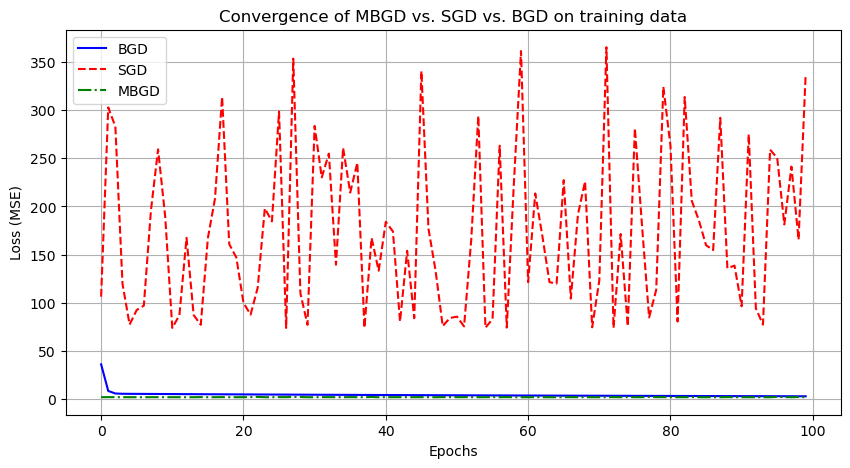

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
# Plot the loss history for the BGD implementation
plt.plot(loss_history_bgd, label= 'BGD', linestyle='-', color='blue')
# Plot the loss history for the SGD implementation
plt.plot(loss_history_sgd, label= 'SGD', linestyle='--', color='red')
# Plot the loss history for the MBGD implementation
plt.plot(loss_history_mbgd, label= 'MBGD', linestyle='-.', color='green')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Convergence of MBGD vs. SGD vs. BGD on training data')
plt.legend()
plt.grid(True)
plt.show()

### 5.2 Compare the trajectories of the loss function values across all optimization algorithms on the test dataset (**2 points**)

Define a function `get_loss_trajectory_on_test()` to implement the Mini-Batch Gradient Descent algorithm to help the model fit. Here are the expected inputs and outputs of the function:

Inputs:
- `X_test`: the input feature vector of shape $(N,1)$
- `y_test`: the target label vector of shape $(N,1)$
- `w_history`: a list of the estimatd slope value of the fit line from each epoch following the chronological order
- `b_history`: a list of the estimatd intercept value of the fit line from each epoch following the chronological order

Returns:
- `loss_history`: a list of the loss value from each epoch following the chronological order

Use the squared error (MSE) as the loss function
$$
MSE = \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$

In [52]:
def get_loss_trajectory_on_test(X_test, y_test, w_history, b_history):
    # Initialize loss_history to store the loss function value at each epoch
    loss_history = []
    # Loop over all the weights and biases in the history
    for w, b in zip(w_history, b_history):
        # Compute the predicted value for the current weight and intercept
        y_pred = w * X_test + b
        # Compute the loss function value for the current weight and intercept
        loss = np.mean((y_test - y_pred) ** 2)
        # Append the loss function value to the loss_history
        loss_history.append(loss)
    return loss_history

### 5.3 Compare the convergence of the loss function values across all optimization algorithms on the test dataset (**2 points**)

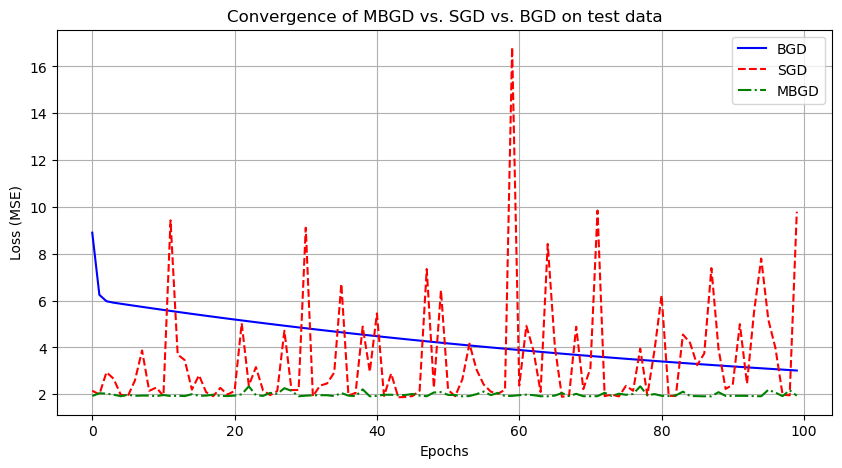

In [56]:
# Get the loss history for the BGD implementation
loss_history_bgd_test = get_loss_trajectory_on_test(X_test, y_test, w_history_bgd, b_history_bgd)
# Get the loss history for the SGD implementation
loss_history_sgd_test = get_loss_trajectory_on_test(X_test, y_test, w_history_sgd, b_history_sgd)
# Get the loss history for the MBGD implementation
loss_history_mbgd_test = get_loss_trajectory_on_test(X_test, y_test, w_history_mbgd, b_history_mbgd)


plt.figure(figsize=(10, 5))
# Plot the loss history for the BGD implementation
plt.plot(loss_history_bgd_test, label='BGD', linestyle='-', color='blue')
# Plot the loss history for the SGD implementation
plt.plot(loss_history_sgd_test, label='SGD', linestyle='--', color='red')
# Plot the loss history for the MBGD implementation
plt.plot(loss_history_mbgd_test, label='MBGD', linestyle='-.', color='green')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Convergence of MBGD vs. SGD vs. BGD on test data')
plt.legend()
plt.grid(True)
plt.show()